In [76]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import wrangle_scott
import scipy.stats as stats
import functions
#splits, scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

In [2]:

df= wrangle_scott.get_wine()



In [3]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,wine_type,white
0,7.4,0.70,0.00,1.9,0.076,0.011,0.034,0.9978,3.51,0.56,9.4,5,red,0
1,7.8,0.88,0.00,2.6,0.098,0.025,0.067,0.9968,3.20,0.68,9.8,5,red,0
2,7.8,0.76,0.04,2.3,0.092,0.015,0.054,0.9970,3.26,0.65,9.8,5,red,0
3,11.2,0.28,0.56,1.9,0.075,0.017,0.060,0.9980,3.16,0.58,9.8,6,red,0
4,7.4,0.70,0.00,1.9,0.076,0.011,0.034,0.9978,3.51,0.56,9.4,5,red,0


In [4]:
train, validate, test = wrangle_scott.split_data(df)

train -> (3897, 14), 59.98%
validate -> (1300, 14),20.01%
test -> (1300, 14), 20.01%


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3897 entries, 3353 to 548
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         3897 non-null   float64
 1   volatile_acidity      3897 non-null   float64
 2   citric_acid           3897 non-null   float64
 3   residual_sugar        3897 non-null   float64
 4   chlorides             3897 non-null   float64
 5   free_sulfur_dioxide   3897 non-null   float64
 6   total_sulfur_dioxide  3897 non-null   float64
 7   density               3897 non-null   float64
 8   ph                    3897 non-null   float64
 9   sulphates             3897 non-null   float64
 10  alcohol               3897 non-null   float64
 11  quality               3897 non-null   int64  
 12  wine_type             3897 non-null   object 
 13  white                 3897 non-null   uint8  
dtypes: float64(11), int64(1), object(1), uint8(1)
memory usage: 430.0+ KB


In [6]:
train.describe(include='all')

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,wine_type,white
count,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897,3897.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,white,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2936,NaN
mean,7.234770,0.338758,0.320719,5.533423,0.056252,0.030800,0.116135,0.994752,3.217865,0.530742,10.479193,5.812933,NaN,0.753400
std,1.302097,0.164181,0.146233,4.828980,0.035599,0.018071,0.056967,0.003022,0.161605,0.148456,1.192935,0.867007,NaN,0.431087
min,3.800000,0.080000,0.000000,0.600000,0.012000,0.001000,0.007000,0.987110,2.740000,0.220000,8.000000,3.000000,NaN,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,0.017000,0.078000,0.992400,3.110000,0.430000,9.500000,5.000000,NaN,1.000000
50%,7.000000,0.290000,0.310000,3.200000,0.047000,0.029000,0.118000,0.994940,3.210000,0.510000,10.300000,6.000000,NaN,1.000000
75%,7.700000,0.400000,0.390000,8.200000,0.065000,0.042000,0.156000,0.997000,3.320000,0.600000,11.300000,6.000000,NaN,1.000000


In [7]:
#sulphates sum of free and total sulfur .... no
0.030800+0.116135

0.146935

In [8]:
# is quality catagorical?
train.quality

3353    6
2032    4
6223    6
2817    8
1293    4
       ..
4918    5
3542    5
1884    5
2206    5
548     6
Name: quality, Length: 3897, dtype: int64

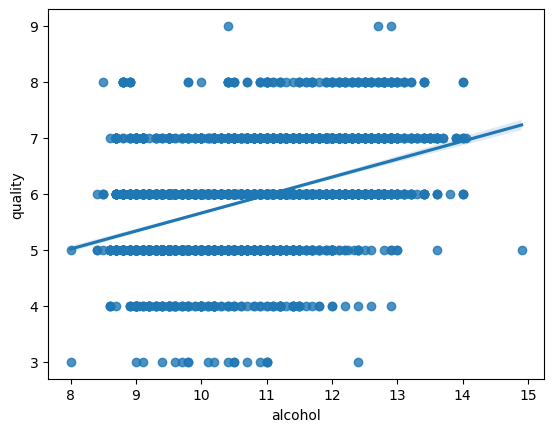

In [9]:
sns.regplot(x='alcohol', y='quality', data=train)
plt.show()


<AxesSubplot:xlabel='alcohol', ylabel='quality'>

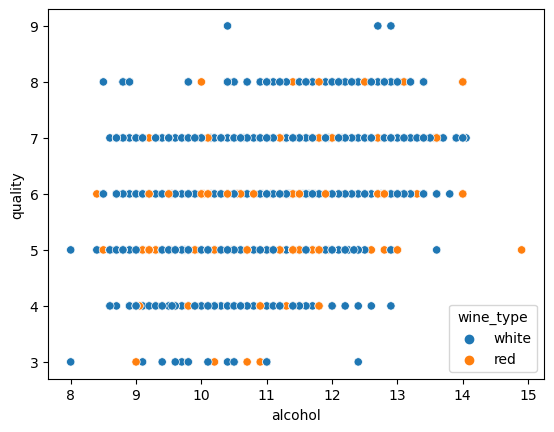

In [10]:
sns.scatterplot(data=train,x='alcohol',y='quality',hue='wine_type')

<BarContainer object of 3897 artists>

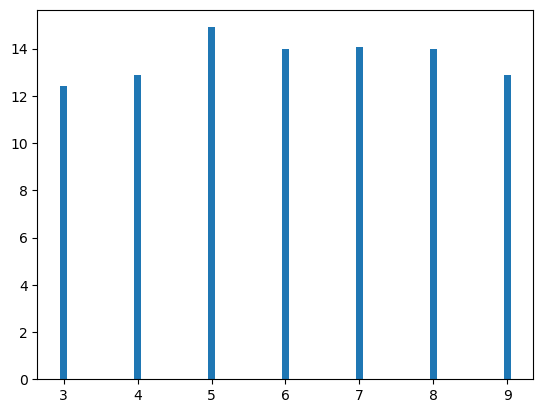

In [11]:
plt.bar(x='quality',height='alcohol',data=train,width=.1,)

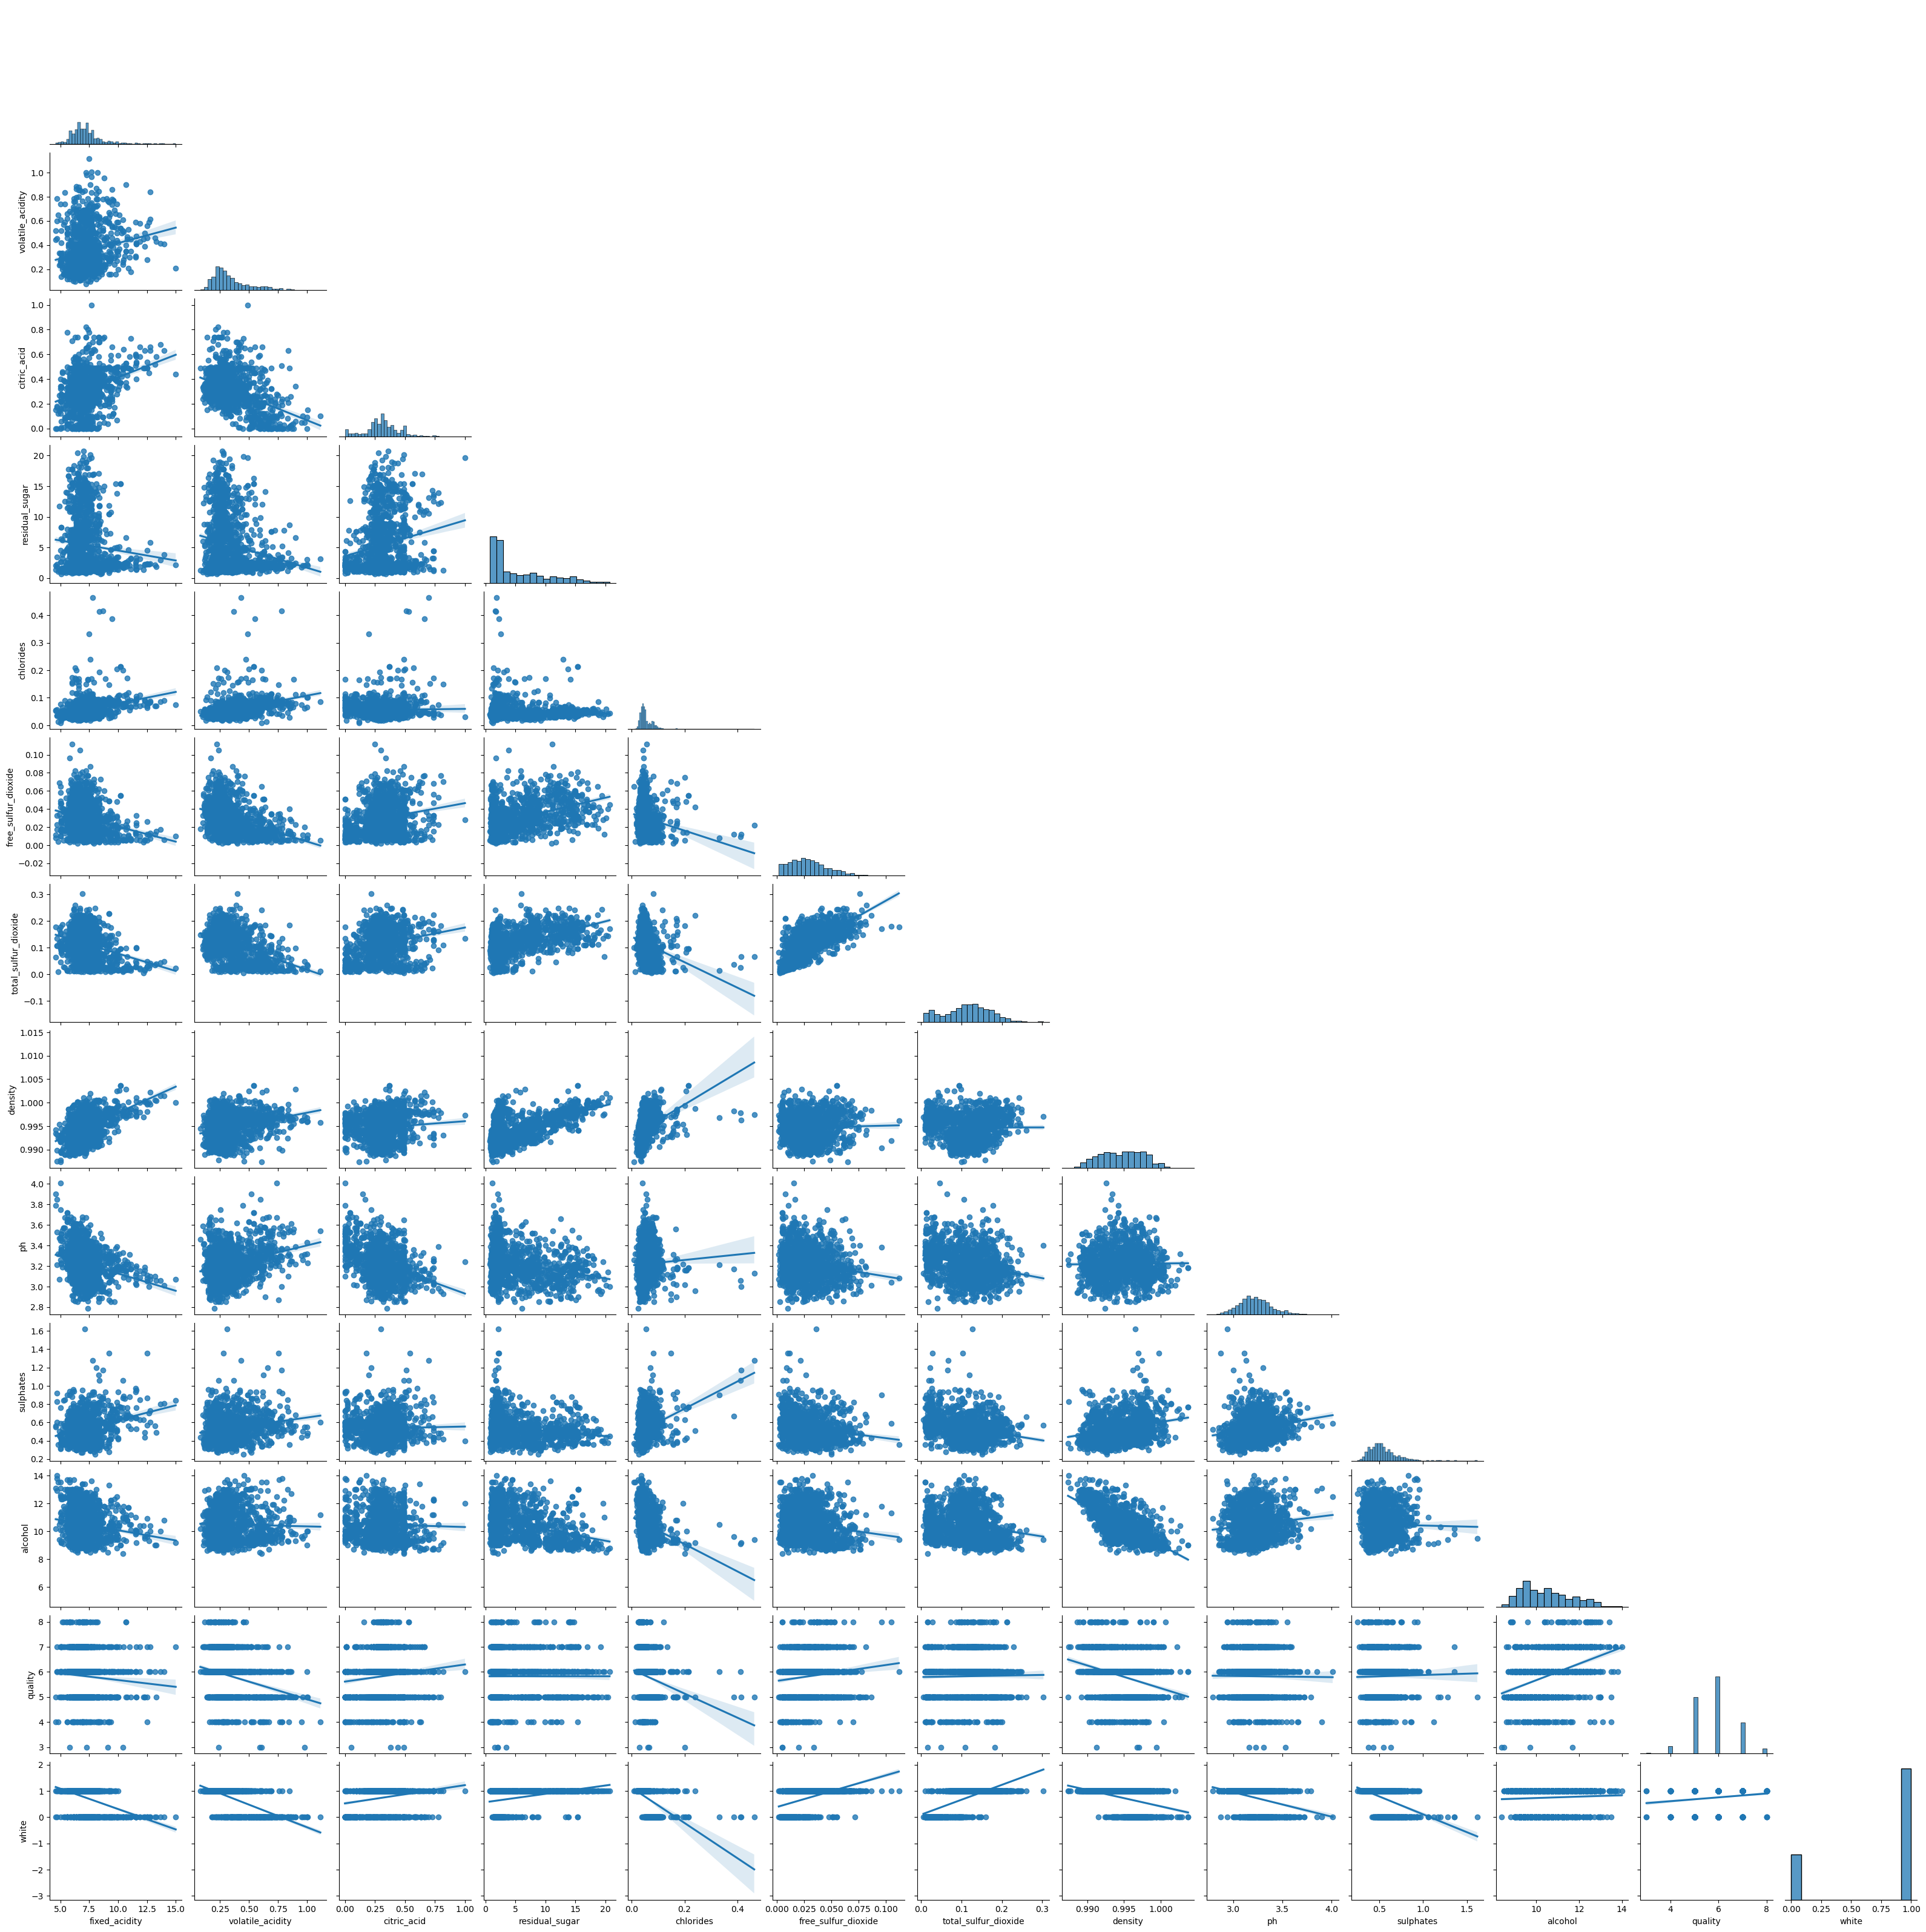

In [12]:
sns.pairplot(test, kind='reg',corner=True)


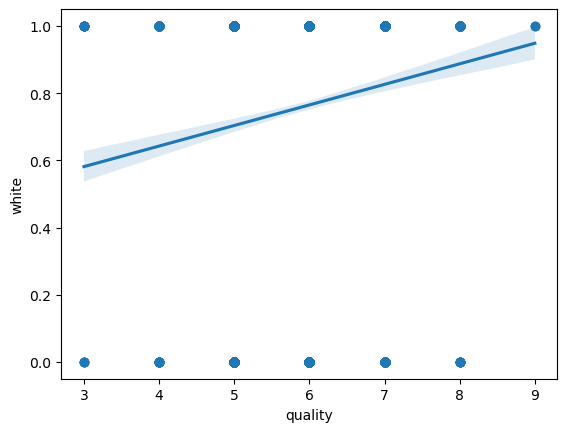

In [13]:
sns.regplot(x='quality', y='white', data=train)
plt.show()

<AxesSubplot:>

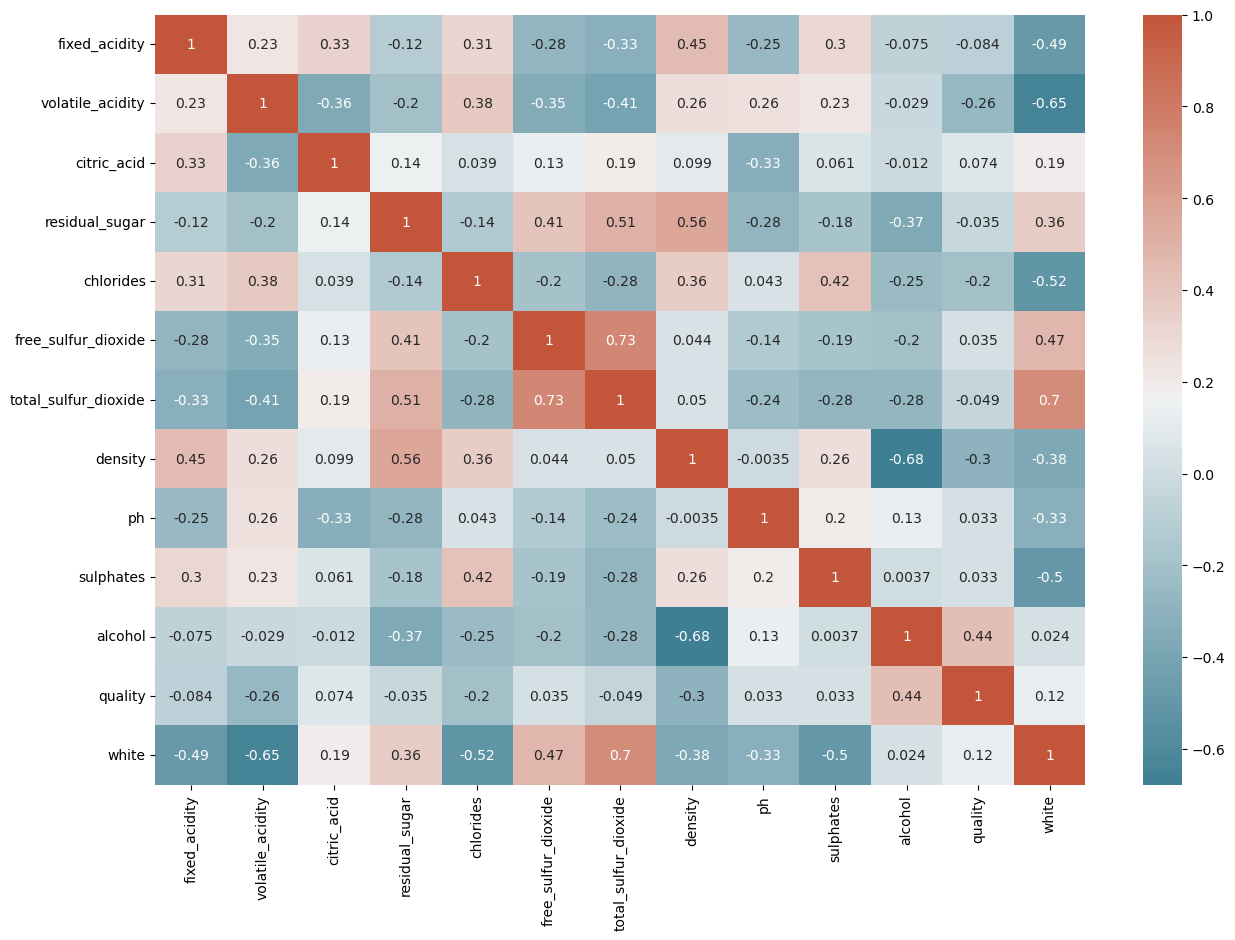

In [14]:
corr = train.corr()
matplotlib.pyplot.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

### notes:
* alcohol / quality = .44
* volatile acidity / quality = .22
* sulphate / quality = .033
* citric acid / quality = .074

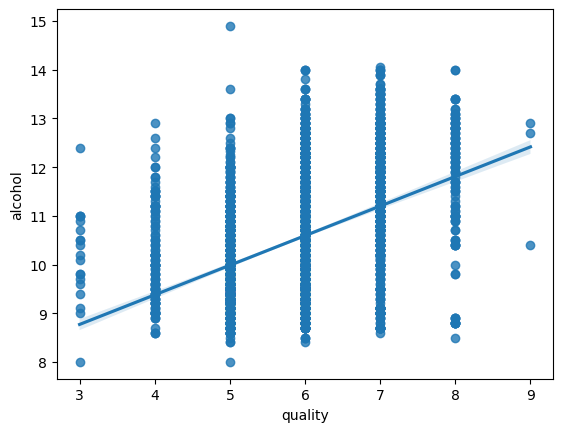

In [15]:
# higher is better
sns.regplot(y='alcohol', x='quality', data=train)
plt.show()

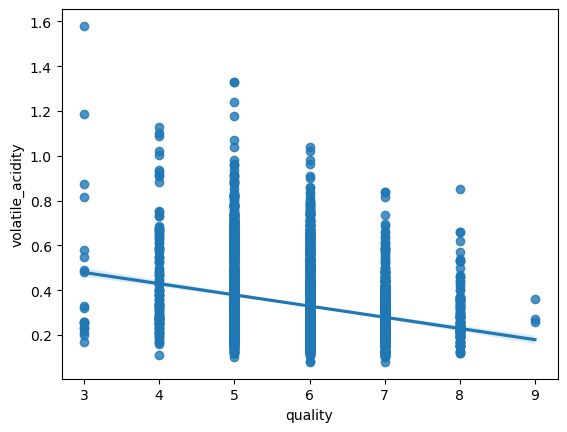

In [16]:

# lower is better
sns.regplot(y='volatile_acidity', x='quality', data=train)
plt.show()

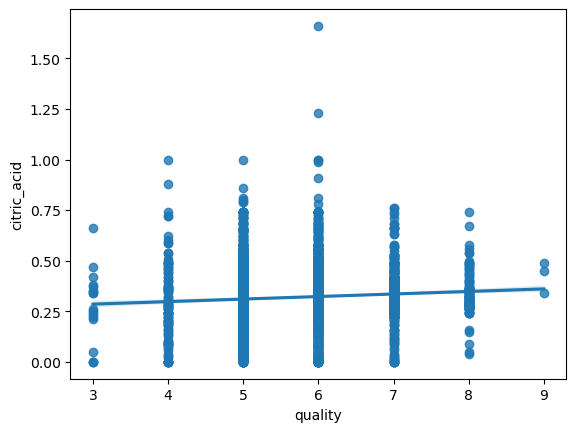

In [17]:
sns.regplot(y='citric_acid', x='quality', data=train)
plt.show()

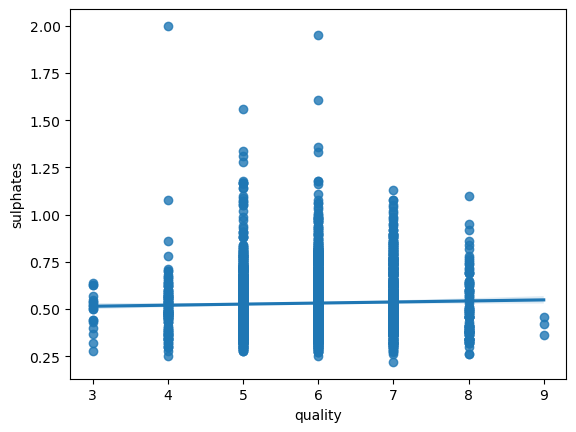

In [18]:
sns.regplot(y='sulphates', x='quality', data=train)
plt.show()

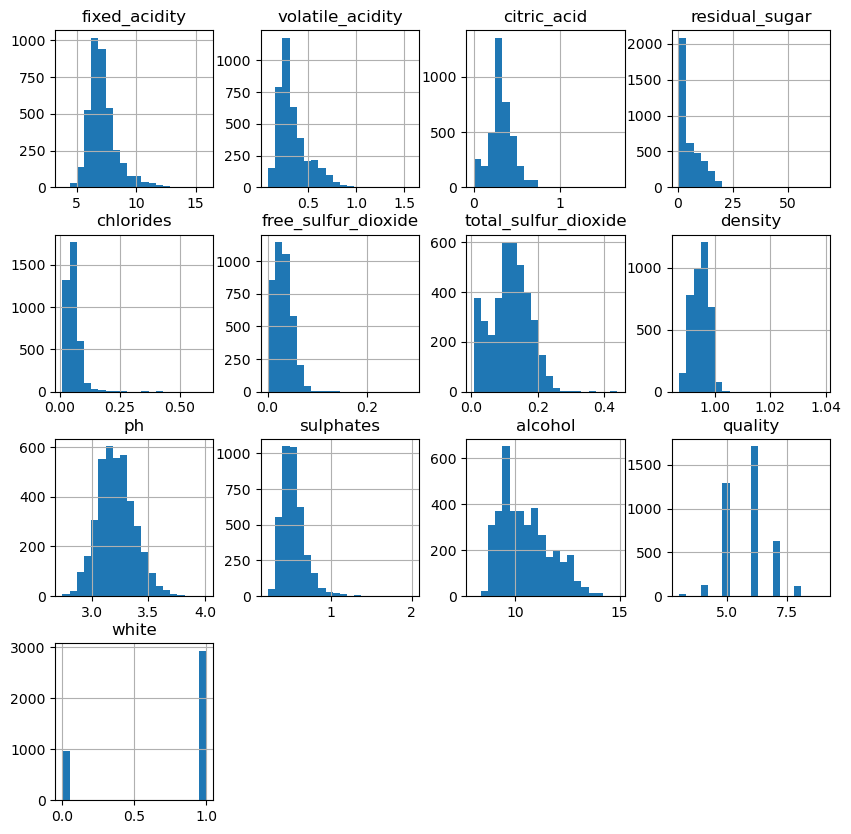

In [19]:
train.hist(bins=20, figsize=(10, 10))
plt.show()

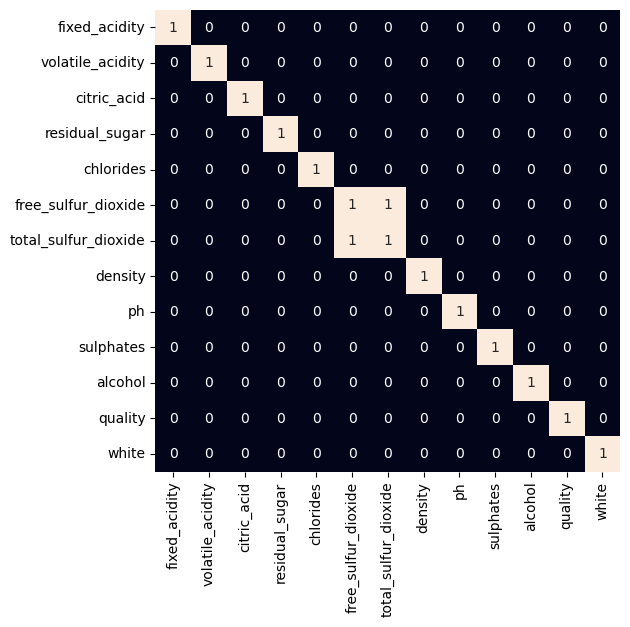

In [20]:
# looking for highly coorolated features
# free and total dioxide are highly coralated drop one
# drop total as free is likely the more important of the 2
plt.figure(figsize=(6, 6))
sns.heatmap(train.corr() > 0.7, annot=True, cbar=False)
plt.show()

In [31]:
# stats
def run_sulphates_ttest(data):
    '''
    runs a Ttest for sulphates vs quality
    '''
    x = data['sulphates']
    y = data['quality']
    # Perform t-test
    t_statistic, p_value = stats.ttest_ind(x, y)
    # Decide whether to reject the null hypothesis
    alpha = 0.05
    if p_value == alpha:
        decision = "Fail to Reject Null Hypothesis"
    else:
        decision = "Reject Null Hypothesis"
# Create a DataFrame to store the results
    results = pd.DataFrame({
        'T-Statistic': [t_statistic],
        'P-Value': [p_value],
        'Decision': [decision]})
    return results

In [32]:
run_sulphates_ttest(train)

,T-Statistic,P-Value,Decision
0,-374.870894,0.0,Reject Null Hypothesis


In [33]:
def run_citric_acid_ttest(data):
    '''
    runs a Ttest for citric acid vs quality
    '''
    x = data['citric_acid']
    y = data['quality']
    # Perform t-test
    t_statistic, p_value = stats.ttest_ind(x, y)
    # Decide whether to reject the null hypothesis
    alpha = 0.05
    if p_value == alpha:
        decision = "Fail to Reject Null Hypothesis"
    else:
        decision = "Reject Null Hypothesis"
# Create a DataFrame to store the results
    results = pd.DataFrame({
        'T-Statistic': [t_statistic],
        'P-Value': [p_value],
        'Decision': [decision]})
    return results

In [34]:
run_citric_acid_ttest(test)

,T-Statistic,P-Value,Decision
0,-224.761112,0.0,Reject Null Hypothesis


In [35]:
def run_alcohol_ttest(data):
    '''
    runs a Ttest for alcohol vs quality
    '''
    x = data['alcohol']
    y = data['quality']
    # Perform t-test
    t_statistic, p_value = stats.ttest_ind(x, y)
    # Decide whether to reject the null hypothesis
    alpha = 0.05
    if p_value == alpha:
        decision = "Fail to Reject Null Hypothesis"
    else:
        decision = "Reject Null Hypothesis"
# Create a DataFrame to store the results
    results = pd.DataFrame({
        'T-Statistic': [t_statistic],
        'P-Value': [p_value],
        'Decision': [decision]})
    return results

In [36]:
run_alcohol_ttest(train)

,T-Statistic,P-Value,Decision
0,197.526362,0.0,Reject Null Hypothesis


In [37]:
def run_volatile_acidity_ttest(data):
    '''
    runs a Ttest for volatile acidity vs quality
    '''
    x = data['volatile_acidity']
    y = data['quality']
    # Perform t-test
    t_statistic, p_value = stats.ttest_ind(x, y)
    # Decide whether to reject the null hypothesis
    alpha = 0.05
    if p_value == alpha:
        decision = "Fail to Reject Null Hypothesis"
    else:
        decision = "Reject Null Hypothesis"
# Create a DataFrame to store the results
    results = pd.DataFrame({
        'T-Statistic': [t_statistic],
        'P-Value': [p_value],
        'Decision': [decision]})
    return results

In [39]:
run_volatile_acidity_ttest(train)

,T-Statistic,P-Value,Decision
0,-387.267364,0.0,Reject Null Hypothesis


In [40]:
# modeling

In [41]:
def get_baseline():
    '''
    this function returns a baseline for accuracy
    '''
    baseline_prediction = y_train.mode()
    # Predict the majority class in the training set
    baseline_pred = [0] * len(y_train)
    accuracy = accuracy_score(y_train, baseline_pred)
    baseline_results = {'Metric': ['Accuracy'], 'Score': [accuracy]}
    baseline_df = pd.DataFrame(data=baseline_results)
    return baseline_df 

In [42]:
def scale_data(train, validate, test, columns):
    """
    Scale the selected columns in the train, validate, and test data.
    Args:
        train (pd.DataFrame): Training data.
        validate (pd.DataFrame): Validation data.
        test (pd.DataFrame): Test data.
        columns (list): List of column names to scale.
    Returns:
        tuple: Scaled data as (X_train_scaled, X_validate_scaled, X_test_scaled).
    """
    # create X & y version of train, where y is a series with just the target variable and X are all the features.
    X_train = train.drop(['quality','total_sulfur_dioxide','wine_type'], axis=1)
    y_train = train['quality']
    X_validate = validate.drop(['quality','total_sulfur_dioxide','wine_type'], axis=1)
    y_validate = validate['quality']
    X_test = test.drop(['quality','total_sulfur_dioxide','wine_type'], axis=1)
    y_test = test['quality']
    # Create a scaler object
    scaler = MinMaxScaler()
    # Fit the scaler on the training data for the selected columns
    scaler.fit(X_train[columns])
    # Apply scaling to the selected columns in all data splits
    X_train_scaled = X_train.copy()
    X_train_scaled[columns] = scaler.transform(X_train[columns])

    X_validate_scaled = X_validate.copy()
    X_validate_scaled[columns] = scaler.transform(X_validate[columns])

    X_test_scaled = X_test.copy()
    X_test_scaled[columns] = scaler.transform(X_test[columns])
    return X_train_scaled, y_train, X_validate_scaled, y_validate, X_test_scaled, y_test

In [43]:
def create_models(seed=123):
    '''
    Create a list of machine learning models.
            Parameters:
                    seed (integer): random seed of the models
            Returns:
                    models (list): list containing the models
    This includes best fit hyperparamaenters                
    '''
    models = []
    models.append(('k_nearest_neighbors', KNeighborsClassifier(n_neighbors=100)))
    models.append(('logistic_regression', LogisticRegression(random_state=seed)))
    models.append(('DecisionTreeClassifier', DecisionTreeClassifier(max_depth=3,min_samples_split=4,random_state=seed)))
    models.append(('random_forest', RandomForestClassifier(max_depth=3,random_state=seed)))
    return models

In [45]:
def get_models():
    # create models list
    models = create_models(seed=123)
    X_train, y_train, X_validate, y_validate, X_test, y_test = get_xy()
    # initialize results dataframe
    results = pd.DataFrame(columns=['model', 'set', 'accuracy', 'recall'])
    
    # loop through models and fit/predict on train and validate sets
    for name, model in models:
        # fit the model with the training data
        model.fit(X_train, y_train)
        
        # make predictions with the training data
        train_predictions = model.predict(X_train)
        
        # calculate training accuracy and recall
        train_accuracy = accuracy_score(y_train, train_predictions)
        train_recall = recall_score(y_train, train_predictions)
        
        # make predictions with the validation data
        val_predictions = model.predict(X_validate)
        
        # calculate validation accuracy and recall
        val_accuracy = accuracy_score(y_validate, val_predictions)
        val_recall = recall_score(y_validate, val_predictions)
        
        # append results to dataframe
        results = results.append({'model': name, 'set': 'train', 'accuracy': train_accuracy, 'recall': train_recall}, ignore_index=True)
        results = results.append({'model': name, 'set': 'validate', 'accuracy': val_accuracy, 'recall': val_recall}, ignore_index=True)
        '''
        this section left in case I want to return to printed format rather than data frame
        # print classifier accuracy and recall
        print('Classifier: {}, Train Accuracy: {}, Train Recall: {}, Validation Accuracy: {}, Validation Recall: {}'.format(name, train_accuracy, train_recall, val_accuracy, val_recall))
        '''
    return results

In [47]:
X_train_scaled, y_train, X_validate_scaled, y_validate, X_test_scaled, y_test = functions.scale_data(train, validate, test, ['alcohol', 'volatile_acidity','sulphates','citric_acid','free_sulfur_dioxide','ph','fixed_acidity','residual_sugar','white','chlorides','density'])

In [49]:
X_train_scaled.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,density,ph,sulphates,alcohol,white
3353,0.214876,0.053333,0.168675,0.024540,0.050167,0.111111,0.082707,0.448819,0.117978,0.449275,1.0
2032,0.280992,0.313333,0.054217,0.013804,0.160535,0.052083,0.128976,0.259843,0.196629,0.173913,1.0
6223,0.214876,0.213333,0.150602,0.055215,0.033445,0.048611,0.053403,0.409449,0.168539,0.739130,1.0
2817,0.280992,0.120000,0.265060,0.099693,0.025084,0.083333,0.113553,0.220472,0.067416,0.449275,1.0
1293,0.305785,0.450000,0.000000,0.019939,0.120401,0.017361,0.185271,0.472441,0.151685,0.246377,0.0


In [50]:
def get_lit(X_train_scaled, variable1, variable2, variable3):
    '''
    Inputs:
    df, variable1, variable2, variable3 as strings
    Outputs:
    some shit, hopefully
    '''
    # create x_train
    C = X_train_scaled[[variable1, variable2, variable3]]
    # initiate kmeans
    kmeans = KMeans(3)
    kmeans.fit(C)
    kmeans.predict(C)
    # create new column with cluster
    train['cluster'] = kmeans.predict(C)
    
    kmeans.cluster_centers_
    centroids = pd.DataFrame(kmeans.cluster_centers_, columns=C.columns[:3])
    train['cluster'] = 'cluster_' + X_train_scaled.cluster.astype(str)
    # begin plotting
    plt.figure(figsize=(14,9))
    plt.figure(figsize=(14,9))

In [ ]:
#get_lit(X_train_scaled, variable1, variable2, variable3)

In [72]:
def get_distplot(train):
    # Plot the distribution of the target variable
    plt.figure(figsize=(12, 3))
    sns.histplot(train['quality'], kde=False, shrink=8)
    plt.xlabel('Quality Rating')
    plt.ylabel('Count')
    plt.title('Distribution of Quality')
    # Add a vertical line for the baseline 
    plt.axvline(x=6, color='red', linestyle='--', label='Baseline')
    plt.legend()
    plt.show()

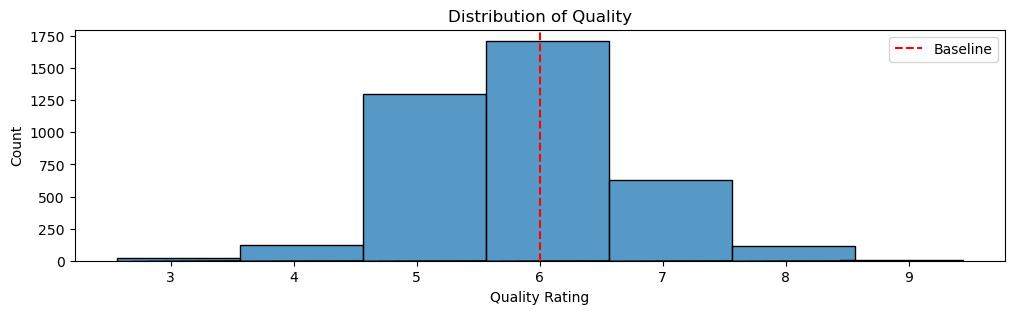

In [73]:
get_distplot(train)

In [77]:
def get_test_model():
    '''
    This will run the k nearest niehbor model on the test set
    '''
    knn= KNeighborsClassifier(n_neighbors=100)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    '''
    #left here incase i want to go back to printed list, rather than df
    print('Logistic Regression')
    print(f'Accuracy on test: {round(accuracy*100,2)}')
    '''
    results_df = pd.DataFrame({'Model': 'Logistic Regression','Accuracy': [accuracy]})
    return results_df



In [78]:
get_test_model()

NameError: name 'accuracy_score' is not defined